In [72]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import math

AU = 149597870700
S0 = np.array([0,0.586*AU])
V0 = np.array([54600,0])
M = 1.989e30
G = 6.6741e-11
year = 31556926

# Zadanie 1

In [75]:
def s_1(x,v,dt):
    return x+v*dt

def v_1(v,r,x,dt):
    return v - G*M*x*dt/(r**3)

def r_1(x):
    return math.sqrt(x[0]**2 + x[1]**2)

def Euler(v0,s0,dt,years):
    t = int(year*years/dt)+1
    s = np.zeros([t,2])
    v = np.zeros([t,2])
    t = np.arange(0,years*year,dt)
    s[0] = s0
    v[0] = v0
    for i in range(1,len(s)):
        s[i] = s_1(s[i-1],v[i-1],dt)
        v[i] = v_1(v[i-1],r_1(s[i-1]),s[i-1],dt)
    return (s,v,t)

In [77]:
def Euler_krok(v0,s0,dt,years,tol):
    temp = 10000000
    s = np.zeros([temp,2])
    v = np.zeros([temp,2])
    t = np.zeros([temp])

    t[0] = dt
    v[0] = v0
    s[0] = s0
    
    i = 1
    time = 0

    while time < year*years:
        
        s[i] = s_1(s[i-1], v[i-1], dt)
        v[i] = v_1(v[i-1], r_1(s[i-1]), s[i-1], dt)

        s_temp = s_1(s[i-1], v[i-1], dt/2)
        v_temp = v_1(v[i-1], r_1(s[i-1]), s[i-1], dt/2)

        s_temp2 = s_1(s_temp, v_temp, dt/2)
        v_temp2 = v_1(v_temp, r_1(s_temp), s_temp, dt/2)

        e_1 = abs(s_temp2[0] - s[i][0])
        e_2 = abs(s_temp2[1] - s[i][1])
        e = e_2 if e_2 > e_1 else e_1
        
        if e<=tol:
            s[i] = s_temp2
            v[i] = v_temp2
            dt = 0.9*dt*((tol/abs(e))**(1/2))
            i += 1
            time += dt
            t[i] = time
        else:
            dt = 0.9*dt*((tol/abs(e))**(1/2))
            continue
    return s, v, t

In [78]:
s, v, t = Euler(V0,S0,2000,200)

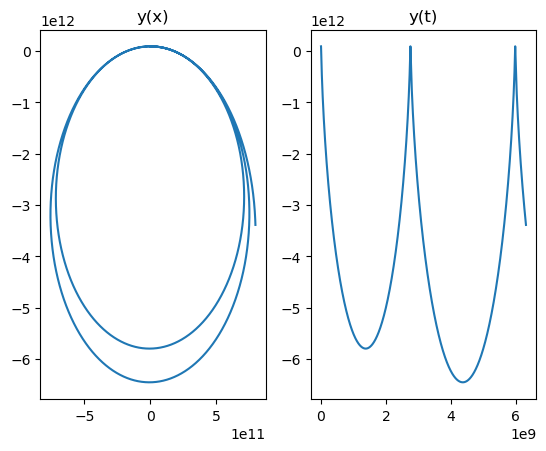

In [79]:
plt.subplot(1,2,1)
plt.title('y(x)')
plt.plot(s.T[0],s.T[1])
plt.subplot(1,2,2)
plt.title('y(t)')
plt.plot(t,s.T[1])

# Zadanie 2

In [80]:
def k1(u):
    f1 = u[2]
    f2 = u[3]
    f3 = (-G*M/r_1(u[:2])**3)*u[0]
    f4 = (-G*M/r_1(u[:2])**3)*u[1]
    return np.array([f1,f2,f3,f4])

def k2(u,dt,K1):
    r = [u[0]+K1[0]*dt/2,u[1]+K1[1]*dt/2]
    f1 = u[2] + K1[2]*dt/2
    f2 = u[3] + K1[3]*dt/2
    f3 = (-G*M/r_1(r)**3)*(u[0]+K1[0]*dt/2)
    f4 = (-G*M/r_1(r)**3)*(u[1]+K1[1]*dt/2)
    return np.array([f1,f2,f3,f4])

def k3(u,dt,K2):
    r = [u[0]+K2[0]*dt/2,u[1]+K2[1]*dt/2]
    f1 = u[2] + K2[2]*dt/2
    f2 = u[3] + K2[3]*dt/2
    f3 = (-G*M/r_1(r)**3)*(u[0] + K2[0]*dt/2)
    f4 = (-G*M/r_1(r)**3)*(u[1] + K2[1]*dt/2)
    return np.array([f1,f2,f3,f4])

def k4(u,dt,K3):
    r = [u[0]+K3[0]*dt,u[1]+K3[1]*dt]
    f1 = u[2] + K3[2]*dt
    f2 = u[3] + K3[3]*dt
    f3 = (-G*M/r_1(r)**3)*(u[0] + K3[0]*dt)
    f4 = (-G*M/r_1(r)**3)*(u[1] + K3[1]*dt)
    return np.array([f1,f2,f3,f4])

def RK4(s0,v0,years,dt):
    t = int(year*years/dt)+1
    u = np.zeros([t,4])
    t = np.arange(0,years*year,dt)
    u[0] = np.append(s0,v0)
    for i in range(1,len(u)):
        K1 = k1(u[i-1])
        K2 = k2(u[i-1],dt, K1)
        K3 = k3(u[i-1],dt, K2)
        K4 = k4(u[i-1],dt, K3)
        u[i] = u[i-1] + dt*(K1 + 2*K2 + 2*K3 + K4)/6
    return (u, t)

In [81]:
def RK4_krok(s0,v0,years,dt,tol):
    temp = 1000000
    u = np.zeros([temp,4])
    t = np.zeros([temp])
    u[0] = np.append(s0,v0)
    t[0] = dt
    u_1 = 0
    i = 1
    time = 0
    while time < year*years:
        K1 = k1(u[i-1])
        K2 = k2(u[i-1],dt, K1)
        K3 = k3(u[i-1],dt, K2)
        K4 = k4(u[i-1],dt, K3)
        u[i] = u[i-1] + dt*(K1 + 2*K2 + 2*K3 + K4)/6

        K1 = k1(u[i-1])
        K2 = k2(u[i-1],dt/2, K1)
        K3 = k3(u[i-1],dt/2, K2)
        K4 = k4(u[i-1],dt/2, K3)
        u_1 = u[i-1] + dt*(K1 + 2*K2 + 2*K3 + K4)/12

        K1 = k1(u_1)
        K2 = k2(u_1,dt/2, K1)
        K3 = k3(u_1,dt/2, K2)
        K4 = k4(u_1,dt/2, K3)
        u_2 = u_1 + dt*(K1 + 2*K2 + 2*K3 + K4)/12

        e_1 = (u_2[0] - u[i][0])/(2**4 - 1)
        e_2 = (u_2[1] - u[i][1])/(2**4 - 1)
        e = e_2 if e_2 > e_1 else e_1
        
        if abs(e)<=tol:
            u[i] = u_2
            dt = 0.9*dt*((tol/abs(e))**(1/5))
        else:
            dt = 0.9*dt*((tol/abs(e))**(1/5))
            continue

        i += 1
        time += dt
        t[i] = t[i-1] + abs(dt)

    return (u, t)

In [82]:
u , t = RK4(S0,V0,200,2000)

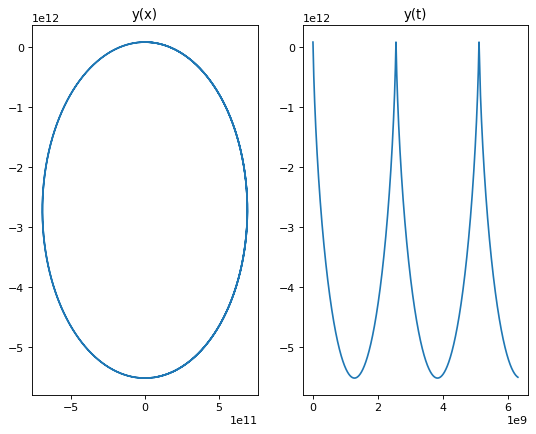

In [88]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title('y(x)')
plt.plot(u.T[0],u.T[1])
plt.subplot(1,2,2)
plt.title('y(t)')
plt.plot(t,u.T[1])